In [1]:
%load_ext autotime
%matplotlib inline
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/anhaid/py_entitymatching/')

In [2]:
import py_entitymatching as em
import py_stringsimjoin as ssj
import profiler
import pandas as pd
import qgrid

time: 1.04 s


In [3]:
A = em.read_csv_metadata('./ORIG_DBLP_ACM/dblp_mur_clean.csv', key='id')
B = em.read_csv_metadata('./ORIG_DBLP_ACM/acm_mur_clean.csv', key='id')

time: 19.6 ms


In [4]:
A.head()

,id,title,authors,venue,year
0,conf/sigmod/RamaswamyK95,OODB Indexing by Class-Division,"Sridhar Ramaswamy, Paris C. Kanellakis",SIGMOD Conference,1995
1,journals/sigmod/GottlobKP03a,XPath processing in a nutshell,"Reinhard Pichler, Christoph Koch, Georg Gottlob",SIGMOD Record,2003
2,conf/sigmod/AndersonBKW98,"Replication, Consistency, and Practicality: Are These Mutually Exclusive?","Avishai Wool, Henry F. Korth, Yuri Breitbart, Todd A. Anderson",SIGMOD Conference,1998
3,conf/vldb/HelalL00,Rainbow: Distributed Database System for Classroom Education and Experimental Research,"Abdelsalam Helal, Hua Li",VLDB,2000
4,conf/sigmod/RaoBG96,Providing Better Support for a Class of Decision Support Queries,"Antonio Badia, Dirk Van Gucht, Sudhir Rao",SIGMOD Conference,1996


time: 11.5 ms


In [5]:
len(B)

1991

time: 1.92 ms


In [6]:
A.head(2)

,id,title,authors,venue,year
0,conf/sigmod/RamaswamyK95,OODB Indexing by Class-Division,"Sridhar Ramaswamy, Paris C. Kanellakis",SIGMOD Conference,1995
1,journals/sigmod/GottlobKP03a,XPath processing in a nutshell,"Reinhard Pichler, Christoph Koch, Georg Gottlob",SIGMOD Record,2003


time: 7.94 ms


In [7]:
B.head(2)

,id,title,authors,venue,year
0,245896,Pixel-oriented database visualizations,Daniel A. Keim,ACM SIGMOD Record,1996
1,672175,Storage and Querying of E-Commerce Data,"Rakesh Agrawal, Amit Somani, Yirong Xu",Very Large Data Bases,2001


time: 8.23 ms


In [8]:
len(A), len(B)

(1979, 1991)

time: 3.17 ms


In [9]:
A1, B1 = em.down_sample(A, B, 300, 1, show_progress=False)
len(A1), len(B1)

(287, 300)

time: 417 ms


### Block tables to get candidate set

In [10]:
# qgrid.show_grid(A)

time: 627 µs


In [11]:
# qgrid.show_grid(B)

time: 498 µs


Number of unique values: 10
Number of missing values: 0

Unique values: 
[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]

Frequency plot:



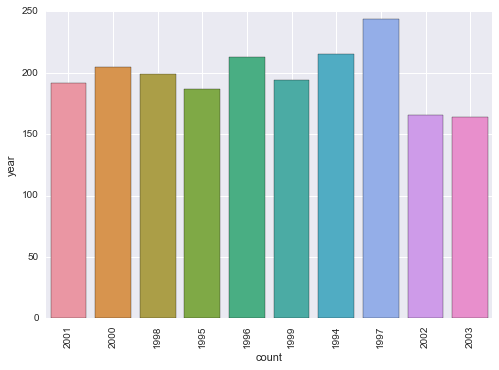

time: 282 ms


In [12]:
profiler.profile_table(A, 'year')

Number of unique values: 10
Number of missing values: 0

Unique values: 
[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]

Frequency plot:



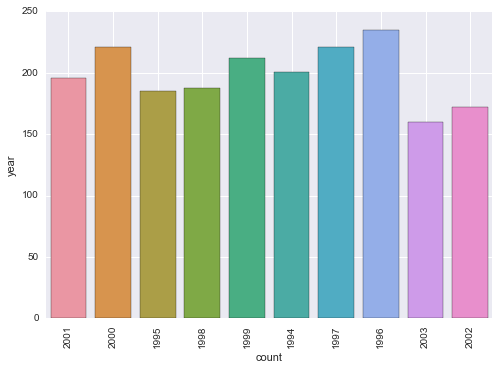

time: 261 ms


In [40]:
profiler.profile_table(B, 'year')

In [14]:
### Plan

### A, B -- AttrEquivalnce blocker [year]--------------------------| Candidate set

time: 692 µs


In [15]:
# Create attribute equivalence blocker
ab = em.AttrEquivalenceBlocker()
# Block tables using 'year' attribute : same year include in candidate set
C1 = ab.block_tables(A, B, 'year', 'year', 
                     l_output_attrs=['title', 'authors', 'year'],
                     r_output_attrs=['title', 'authors', 'year']
                    )

time: 186 ms


In [16]:
C1.head(2)

,_id,ltable_id,rtable_id,ltable_title,ltable_authors,ltable_year,rtable_title,rtable_authors,rtable_year
0,0,conf/sigmod/RamaswamyK95,223898,OODB Indexing by Class-Division,"Sridhar Ramaswamy, Paris C. Kanellakis",1995,Paradise: a database system for GIS applications,CORPORATE The Paradise Team,1995
1,1,conf/sigmod/RamaswamyK95,210202,OODB Indexing by Class-Division,"Sridhar Ramaswamy, Paris C. Kanellakis",1995,Fast algorithms for universal quantification in large databases,"Goetz Graefe, Richard L. Cole",1995


time: 13 ms


### Debug blocking output

In [17]:
# Debug blocking output

# check whether the current blocking method has dropped a lot of potential matches
dbg = em.debug_blocker(C1, A, B, output_size=30)

time: 1.34 s


In [18]:
dbg.head(5)

,_id,similarity,ltable_id,rtable_id,ltable_title,ltable_authors,ltable_venue,rtable_title,rtable_authors,rtable_venue
0,0,0.727273,journals/vldb/GibsonKR00,671202,Clustering Categorical Data: An Approach Based on Dynamical Systems,"David Gibson, Jon M. Kleinberg, Prabhakar Raghavan",VLDB J.,Clustering Categorical Data: An Approach Based on Dynamical Systems,"David Gibson, Jon M. Kleinberg, Prabhakar Raghavan",Very Large Data Bases
1,1,0.687500,journals/vldb/ShanmugasundaramSBCLPR01,671695,Efficiently publishing relational data as XML documents,"Bruce G. Lindsay, Hamid Pirahesh, Berthold Reinwald, Michael J. Carey, Rimon Barr, Jayavel Shanm...",VLDB J.,Efficiently Publishing Relational Data as XML Documents,"Jayavel Shanmugasundaram, Eugene J. Shekita, Rimon Barr, Michael J. Carey, Bruce G. Lindsay, Ham...",Very Large Data Bases
2,2,0.666667,journals/vldb/ManegoldBK00,671364,Optimizing database architecture for the new bottleneck: memory access,"Peter A. Boncz, Stefan Manegold, Martin L. Kersten",VLDB J.,Database Architecture Optimized for the New Bottleneck: Memory Access,"Peter A. Boncz, Stefan Manegold, Martin L. Kersten",Very Large Data Bases
3,3,0.650000,conf/vldb/GibbonsMP97,581753,Fast Incremental Maintenance of Approximate Histograms,"Yossi Matias, Phillip B. Gibbons, Viswanath Poosala",VLDB,Fast incremental maintenance of approximate histograms,"Phillip B. Gibbons, Yossi Matias, Viswanath Poosala",ACM Transactions on Database Systems (TODS)
4,4,0.636364,journals/vldb/JagadishACLNPPSWWY02,872862,TIMBER: A native XML database,"Andrew Nierman, Cong Yu, Jignesh M. Patel, Adriane Chapman, Nuwee Wiwatwattana, H. V. Jagadish, ...",VLDB J.,TIMBER: a native system for querying XML,"Stelios Paparizos, Shurug Al-Khalifa, Adriane Chapman, H. V. Jagadish, Laks V. S. Lakshmanan, An...",International Conference on Management of Data


time: 16.6 ms


In [19]:
# Revised blocking plan

# A, B -- AttrEquivalnce blocker [year] --------------------|
#                                                           |---> candidate set
# A, B -- Overlap blocker [title]---------------------------|

time: 785 µs


In [20]:
profiler.profile_table(A, 'title')

Number of unique values: 1970
Number of missing values: 0
time: 5.12 ms


In [21]:
profiler.profile_table(B, 'title')

Number of unique values: 1978
Number of missing values: 0
time: 5.33 ms


In [22]:
ob = em.OverlapBlocker()
C2 = ob.block_tables(A, B, 'authors', 'authors', show_progress=False, overlap_size=1)

time: 616 ms


In [23]:
C = em.combine_blocker_outputs_via_union([C1, C2])

time: 833 ms


In [24]:
# debug blocker
# check again with the updated blocking pipleline
dbg = em.debug_blocker(C, A, B, output_size=50)

time: 2.71 s


In [37]:
em.set_ltable(dbg, A)
em.set_rtable(dbg, B)

True

time: 2.43 ms


In [38]:
d1 = em.add_output_attributes(dbg, l_output_attrs=['year'], r_output_attrs=['year'], delete_from_catalog=False)

time: 12.2 ms


In [39]:
d1.head(5)

,_id,similarity,ltable_id,rtable_id,ltable_title,ltable_authors,ltable_venue,rtable_title,rtable_authors,rtable_venue,ltable_year,rtable_year
0,0,0.384615,journals/sigmod/Suciu01,344853,On Database Theory and XML,Dan Suciu,SIGMOD Record,On views and XML,Serge Abiteboul,ACM SIGMOD Record,2001,1999
1,1,0.363636,journals/sigmod/Ritter98,219777,The Middleware Muddle,David Ritter,SIGMOD Record,The new middleware,Rich Finkelstein,ACM SIGMOD Record,1998,1995
2,2,0.363636,journals/sigmod/Finkelstein95,306141,The New Middleware,Rich Finkelstein,SIGMOD Record,The middleware muddle,David Ritter,ACM SIGMOD Record,1995,1998
3,3,0.352941,journals/sigmod/Yang94,640993,A Hypertext Query Language for Images,Li Yang,SIGMOD Record,A graphical query language for mobile information systems,Ya-Hui Chang,ACM SIGMOD Record,1994,2003
4,4,0.352941,journals/sigmod/Chang03,181554,A Graphical Query Language for Mobile Information Systems,Ya-Hui Chang,SIGMOD Record,A hypertext query language for images,Li Yang,ACM SIGMOD Record,2003,1994


time: 15.9 ms


In [26]:
s = em.read_csv_metadata('./ORIG_DBLP_ACM/dblp_acm_demo_labels_clean.csv', ltable=A, rtable=B)

time: 8.66 ms
